<div>
<img align="center"
src="Images/HT-banner-CONV.png" width="950" height="9500"/>
</div>


### <center> Capa límite térmica <center/>
Si el fluido y la placa están a temperaturas diferentes, también se formará una capa límite térmica
   
<div>
<img align="center"
src="Images/thermal_bl.jpg" width="500" height="500"/>
</div>

La ecuación de conservación de energía que tenemos que resolver para la capa límite es

$$ u \dfrac{\partial T}{\partial x}+ v \dfrac{\partial T}{\partial y} = \alpha \dfrac{\partial^2 T}{\partial y^2}$$

donde $u$ y $v$ son las velocidades obtenidas para la capa límite. En términos de la función de corriente $f$  y de la variable de similaridad $\eta$, la conservación de energía toma la forma

$$\dfrac{d^2 T*}{d \eta^2}+ \dfrac{Pr}{2}f\dfrac{dT*}{d\eta}=0,\quad(2)$$

con $T^* = (T-T_s)/(T_\infty-T_s)$ y el número de Prantdl $Pr=\nu/\alpha$.

Las condiciones de frontera son

$$T^*(0)=0, \qquad T^* = 1.$$

La ecuación (2) debe ser integrada numéricamente con las ecuaciones de frontera mencionadas. El resultado indica que para $Pr>0.6$

$$\dfrac{dT^*}{d \eta} \Big{|}_{\eta=0} = 0.332 Pr^{1/3}$$

(a) Integrar numéricamente la ecuación de transferencia de calor en la capa límite y graficar el campo de temperaturas

(a) Explicar los efectos de $Pr$ en la gráfica de la temperatura $T^*(y)$

(b) Graficar $\delta$ y $\delta_t$

(c) Calcular y graficar la cantidad de calor que pasa del fluido a la placa, o viceversa. Recordando que el coeficiente de transferencia de calor local está definido por

$$h_x = \dfrac{{q_x}^{"}}{T_s-T_\infty} = - \dfrac{T_{\infty}-T_s}{T_s-T_\infty} k \dfrac{\partial T^*}{\partial y} \Big{|}_{y=0} = k \left(\dfrac{u_\infty}{\nu x}\right)^{1/2} \dfrac{\partial T^*}{\partial \eta} \Big{|}_{\eta=0}.$$

(d) Calcular y graficar el número de Nusselt dado por 

$$Nu_x = \dfrac{h_x x}{k},$$

y es la razón entre el flujo de calor convectivo entre el flujo de calor conductivo. $Nu_x= 1$ implica que el flujo de calor convectivo es igual al flujo de calor conductivo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [2]:
#Definir parámetros
ui  = 0.01
nu  = 0.00000179
x0  = 0.01
ETA = 35
eta = np.linspace(0,7,ETA)
x   = np.linspace(0,0.01,ETA)
y   = np.linspace(0,0.01,ETA)
Pr1 = 10
Pr2 = 1
Pr3 = 0.6

In [3]:
#Solución numérica de la capa límite hidrodinámica y térmica
def blasT(f,t,Pr):
    return(f[1],f[2],-0.5*f[0]*f[2],f[4],-0.5*Pr*f[0]*f[4])

def blasTBC(x,ts,Pr):
    f0 = (0,0,0.332,0.0,x)
    f = odeint(blasT,f0,ts,args=(Pr,))
    return 1.-f[-1,3]

tbl1 = fsolve(blasTBC,x0=0.2,args=(eta,Pr1))
tbl2 = fsolve(blasTBC,x0=0.2,args=(eta,Pr2))
tbl3 = fsolve(blasTBC,x0=0.2,args=(eta,Pr3))

f1 = [0.,0.,0.332,0.,tbl1]
fT1  = odeint(blasT,f1,eta,args=(Pr1,))
f2 = [0.,0.,0.332,0.,tbl2]
fT2  = odeint(blasT,f2,eta,args=(Pr2,))
f3 = [0.,0.,0.332,0.,tbl3]
fT3  = odeint(blasT,f3,eta,args=(Pr3,))

Tbl1 = pd.DataFrame(data={"n": np.round(eta,4), "f": fT1[:,0], "dfdn": fT1[:,1],"dfdn2": fT1[:,2],"dTdn": fT1[:,3],"dTdn2": fT1[:,4]})
Tbl2 = pd.DataFrame(data={"n": np.round(eta,4), "f": fT2[:,0], "dfdn": fT2[:,1],"dfdn2": fT2[:,2],"dTdn": fT2[:,3],"dTdn2": fT2[:,4]})
Tbl3 = pd.DataFrame(data={"n": np.round(eta,4), "f": fT3[:,0], "dfdn": fT3[:,1],"dfdn2": fT3[:,2],"dTdn": fT3[:,3],"dTdn2": fT3[:,4]})

0.332*Pr1**(1/3.),0.332*Pr2**(1/3.),0.332*Pr3**(1/3.)

(0.7152723170905855, 0.332, 0.2800196448801808)

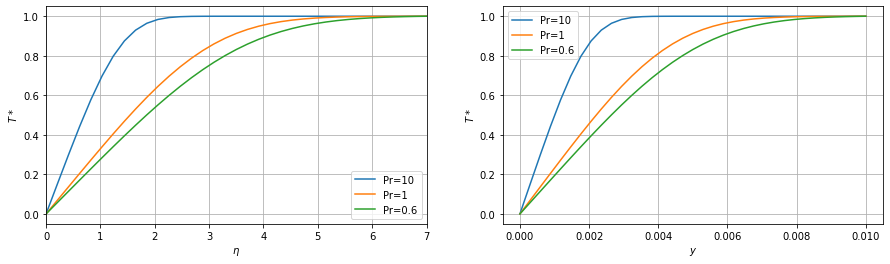

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

ax1.plot(Tbl1.n,Tbl1.dTdn,label='Pr=10')
ax1.plot(Tbl2.n,Tbl2.dTdn,label='Pr=1')
ax1.plot(Tbl3.n,Tbl3.dTdn,label='Pr=0.6')
ax1.set_xlabel("$\eta$")
ax1.set_ylabel("$T*$")
ax1.grid()
ax1.legend()
ax1.set_xlim(0,7)

ax2.plot(y,Tbl1.dTdn,label='Pr=10')
ax2.plot(y,Tbl2.dTdn,label='Pr=1')
ax2.plot(y,Tbl3.dTdn,label='Pr=0.6')
ax2.set_xlabel("$y$")
ax2.set_ylabel("$T*$")
ax2.grid()
ax2.legend()

plt.show()

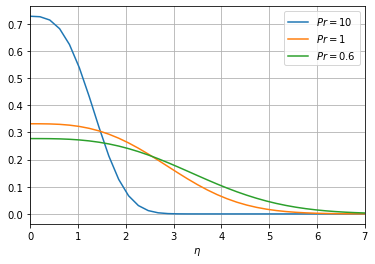

In [5]:
plt.plot(eta,fT1[:,4],label="$Pr=10$")
plt.plot(eta,fT2[:,4],label="$Pr=1$")
plt.plot(eta,fT3[:,4],label="$Pr=0.6$")
plt.xlabel("$\eta$")
plt.grid()
plt.legend()
plt.xlim(0,7)
plt.show()

/tmp/ipykernel_1310189/931543980.py:1: RuntimeWarning: divide by zero encountered in true_divide
  delta   = (5)/np.sqrt((ui)/(nu*x))


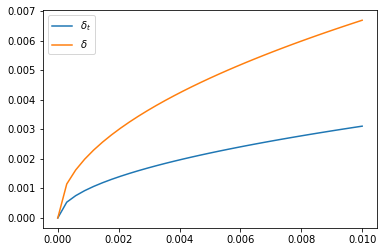

In [7]:
delta   = (5)/np.sqrt((ui)/(nu*x))
deltat = delta/(Pr1**(1/3))

plt.plot(x,deltat,label="$\\delta_t$")
plt.plot(x,delta,label="$\\delta$")
plt.legend()

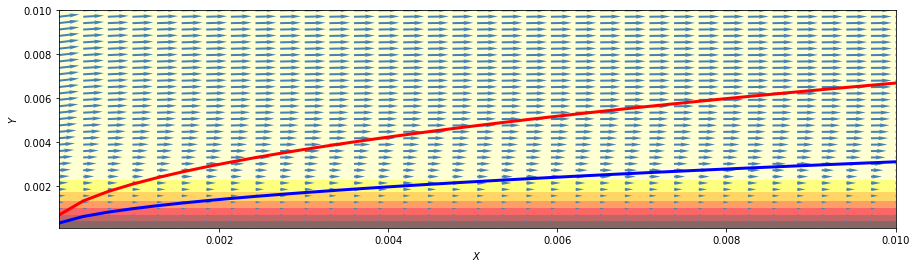

In [33]:
l = len(Tbl1.dTdn)
x    = np.linspace(0.0001,0.01,ETA)
y    = np.linspace(0.0001,0.01,ETA)
Y,X    = np.meshgrid(x,y)
delta  = (5)/np.sqrt((ui)/(nu*x))
deltat1 = delta/(Pr1**(1/3))
eta    = np.full((len(Tbl1),len(Tbl1)),Tbl1.n)
dfdeta = np.full((len(Tbl1),len(Tbl1)),Tbl1.dfdn)
f      = np.full((len(Tbl1),len(Tbl1)),Tbl1.f)
u      = ui*dfdeta
v      = (1/2.)*np.sqrt((nu*ui)/X)*((eta*dfdeta)-f)
M      = np.sqrt(u*u+v*v) # magnitude
T1      = np.full((l,l),Tbl1.dTdn)

plt.figure(figsize=(15,4))
#plt.contourf(X, Y,M,cmap=plt.cm.viridis,alpha=0.6)
plt.contourf(X,Y,T1,cmap=plt.cm.hot,alpha=0.6)
plt.quiver(X, Y, 10*u,v,color="steelblue",scale=4,headwidth=2)
plt.plot(x,delta,'red',linewidth=3)
plt.plot(x,deltat1,'blue',linewidth=3)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

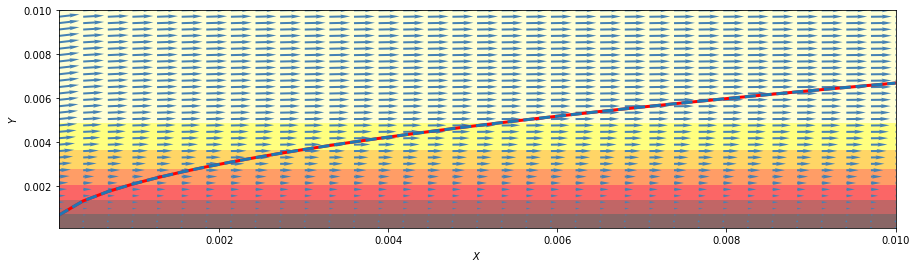

In [34]:
delta  = (5)/np.sqrt((ui)/(nu*x))
deltat2 = delta/(Pr2**(1/3))
eta    = np.full((len(Tbl2),len(Tbl2)),Tbl2.n)
dfdeta = np.full((len(Tbl2),len(Tbl2)),Tbl2.dfdn)
f      = np.full((len(Tbl2),len(Tbl2)),Tbl2.f)
u      = ui*dfdeta
v      = (1/2.)*np.sqrt((nu*ui)/X)*((eta*dfdeta)-f)
M      = np.sqrt(u*u+v*v) # magnitude
T2     = np.full((l,l),Tbl2.dTdn)

plt.figure(figsize=(15,4))
#plt.contourf(X, Y,M,cmap=plt.cm.viridis,alpha=0.6)
plt.contourf(X,Y,T2,cmap=plt.cm.hot,alpha=0.6)
plt.quiver(X, Y, 10*u,v,color="steelblue",scale=4,headwidth=2)
plt.plot(x,delta,'r',linewidth=3)
plt.plot(x,deltat2,'--',linewidth=3)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

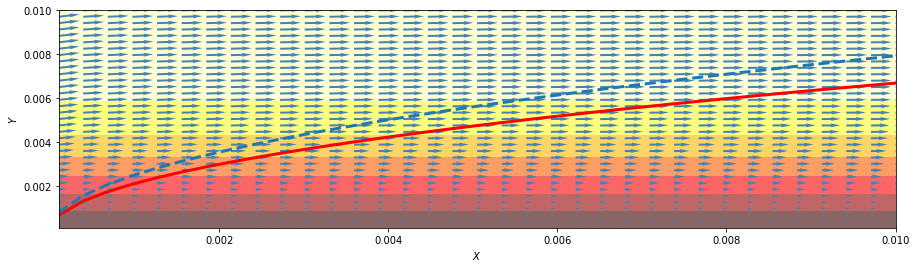

In [35]:
delta  = (5)/np.sqrt((ui)/(nu*x))
deltat3 = delta/(Pr3**(1/3))
eta    = np.full((len(Tbl3),len(Tbl3)),Tbl3.n)
dfdeta = np.full((len(Tbl3),len(Tbl3)),Tbl3.dfdn)
f      = np.full((len(Tbl3),len(Tbl3)),Tbl3.f)
u      = ui*dfdeta
v      = (1/2.)*np.sqrt((nu*ui)/X)*((eta*dfdeta)-f)
M      = np.sqrt(u*u+v*v) # magnitude
T3     = np.full((l,l),Tbl3.dTdn)

plt.figure(figsize=(15,4))
#plt.contourf(X, Y,M,cmap=plt.cm.viridis,alpha=0.6)
plt.contourf(X,Y,T3,cmap=plt.cm.hot,alpha=0.6)
plt.quiver(X, Y, 10*u,v,color="steelblue",scale=4,headwidth=2)
plt.plot(x,delta,'r',linewidth=3)
plt.plot(x,deltat3,'--',linewidth=3)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

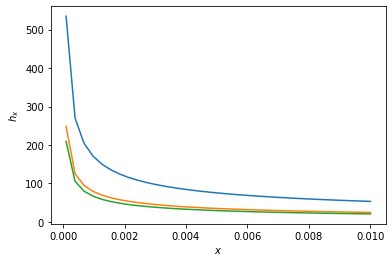

In [36]:
def hx(ui,nu,x,k,Pr):
    hx = k*np.sqrt(ui/(nu*x))*0.332*Pr**(1/3)
    return hx

plt.plot(x,hx(ui,nu,x,0.1,Pr1))
plt.plot(x,hx(ui,nu,x,0.1,Pr2))
plt.plot(x,hx(ui,nu,x,0.1,Pr3))
plt.xlabel("$x$")
plt.ylabel("$h_x$")
plt.show()

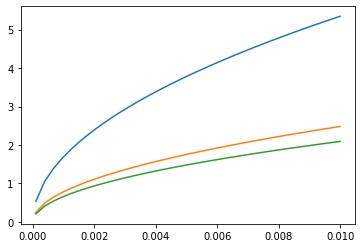

In [37]:
def Nux(hx,x,k):
    Nu = (hx*x)/k
    return Nu

plt.plot(x,Nux(hx(ui,nu,x,0.1,Pr1),x,0.1))
plt.plot(x,Nux(hx(ui,nu,x,0.1,Pr2),x,0.1))
plt.plot(x,Nux(hx(ui,nu,x,0.1,Pr3),x,0.1))